In [1]:
import csv, os
import numpy as np
import Helpers, src

In [2]:
covidFile = open("owid-covid-data.csv")
covidReader = csv.reader(covidFile)
myList = list(covidReader)
myList = Helpers.removeEmptyLists(myList)  # Remove empty rows from csv file
#print(myList[0][1])  # continent column
#print(myList[0][3])  # date column
#print(myList[0][4])  # total cases column
#print(myList[0][7])  # total deaths column
#print(myList[0][36]) # total fully vaccinated column

In [3]:
years = ['2020', '2021']
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Oceania']

months_list = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
               '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
               '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
               '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']  # Date format for Tableau

months_labels = ['Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '',
                 'Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '']  # xtick labels for matplotlib

covidDictionary = {

    "casesByMonth" : {"Asia" :          {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Africa" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "North America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},
 
                      "South America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Europe" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Oceania" :       {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]} },

    
    "deathsByMonth" : {"Asia" :         {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Africa" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "North America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},
 
                      "South America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Europe" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},
                    
                      "Oceania" :       {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]} },

    
    "vaccinatedByMonth" : {"Asia" :     {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Africa" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "North America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},
 
                      "South America" : {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},

                      "Europe" :        {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]},
    
                      "Oceania" :       {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                                         '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]} },

    }

In [4]:
temp_loc, temp_cases, temp_deaths, temp_vacc, temp_month, temp_cont, temp_year = ['', ''], ['', ''], ['', ''], ['', ''], ['', ''], ['',''], ['','']

#Printing the entirety of a list can use a lot of memory, instead you can use a for loop.
for i, row in enumerate(myList):
    
        if i==0: continue
            
        if temp_year[0] == '2020': year_index = 0
        else: year_index = 1
               
        # Temporary lists check when the month or location has changed.   
        temp_loc[0]   = temp_loc[1]
        temp_loc[1]   = myList[i][2]

        temp_cont[0] = temp_cont[1]
        temp_cont[1] = myList[i][1]

        temp_month[0] = temp_month[1]
        temp_month[1] = myList[i][3][5:7]

        temp_year[0] = temp_year[1]
        temp_year[1] = myList[i][3][:4]

        temp_cases[0] = temp_cases[1]
        temp_cases[1] = myList[i][4]

        temp_deaths[0] = temp_deaths[1]
        temp_deaths[1] = myList[i][7]

        temp_vacc[0] = temp_vacc[1]
        temp_vacc[1] = myList[i][36]
        
        for key in covidDictionary.keys():

            if temp_cont[0] == '': continue

            if key == "casesByMonth":
                if  temp_cases[0] == '': continue  # Skip instances where data is not recorded.
                src.total_calculator(covidDictionary, key, temp_cases, temp_loc, temp_cont, temp_month, year_index)

            elif key == "deathsByMonth":
                if  temp_deaths[0] == '': continue  
                src.total_calculator(covidDictionary, key, temp_deaths, temp_loc, temp_cont, temp_month, year_index)

            elif key == "vaccinatedByMonth":
                if  temp_vacc[0] == '': continue  
                src.total_calculator(covidDictionary, key, temp_vacc, temp_loc, temp_cont, temp_month, year_index)

                
# Convert dictionary key-value pairs to ordered lists (easier for matplotlib) 
casesByMonthList, deathsByMonthList, vaccByMonthList = [], [], []

for cont in covidDictionary['casesByMonth']:
    casesByMonthList.append(list(covidDictionary['casesByMonth'][cont].values()))
    deathsByMonthList.append(list(covidDictionary['deathsByMonth'][cont].values()))
    vaccByMonthList.append(list(covidDictionary['vaccinatedByMonth'][cont].values()))
    

total_cases, total_deaths, total_vaccinated = [], [], []

for index1, cont in enumerate(continents):
    
    # Continent order: Asia, Africa, NA, SA, Europe, Oceania
    total_cases.append([])
    total_deaths.append([])
    total_vaccinated.append([])
    
    for index2, months in enumerate(years):
        
        for index3 in range(12): 
            
            # Month/Year order: Jan 2020, Feb 2020, March 2020 ... Nov 2021, Dec 2021
            total_cases[index1].append(casesByMonthList[index1][index3][index2])
            total_deaths[index1].append(deathsByMonthList[index1][index3][index2])
            total_vaccinated[index1].append(vaccByMonthList[index1][index3][index2])


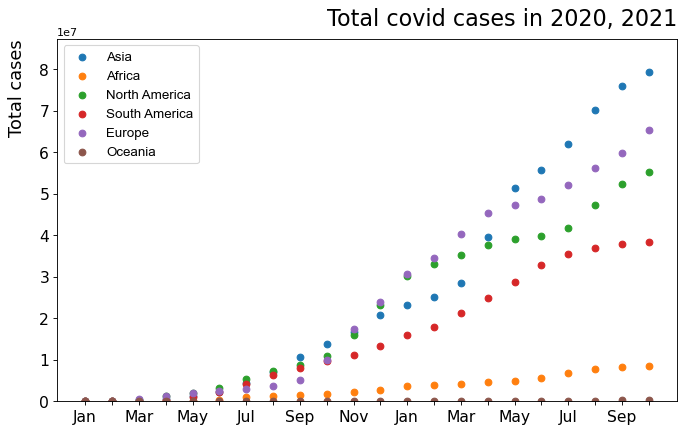

In [5]:
labels = ['', 'Total cases', 'Total covid cases in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[ : 22])
    y.append(total_cases[i][ : 22])

yrange = [0, max(max(y)) * 1.1]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, xTick = [True, months_list[:22], months_labels[:22]])

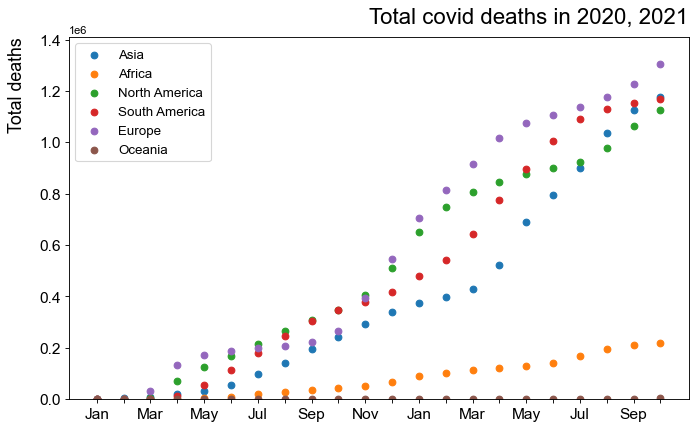

In [6]:
labels = ['', 'Total deaths', 'Total covid deaths in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[ : 22])
    y.append(total_deaths[i][ : 22])
    
yrange = [0, max(max(y)) * 1.2]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, xTick = [True, months_list[ : 22], months_labels[ : 22]])

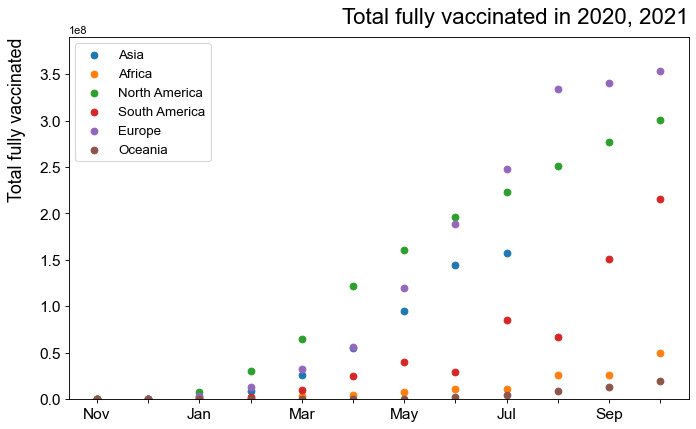

In [7]:
labels = ['', 'Total fully vaccinated', 'Total fully vaccinated in 2020, 2021', continents]
x, y = [], []

for i in range(6):
    x.append(months_list[10 : 22])
    y.append(total_vaccinated[i][10 : 22])
    
yrange = [0, max(max(y)) * 1.3]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, xTick = [True, months_list[10 : 22], months_labels[10 : 22]])

In [8]:
# Write data to Tableau-friendly csv format
outputFile = open("covid_data.csv", "w")
outputWriter = csv.writer(outputFile, lineterminator="\n")
outputWriter.writerow([ "Date", "Continent", "Total cases", "Total deaths", "Total fully vaccinated" ])  # Column headers

for cont in continents:
    for index, date in enumerate(months_list):
        
        if index == 22: break  # Stop at Octobor 2021, since Nov/Dec 2021 data is not complete.
        
        if index < 12: i = 0   # At 2021, loop back to January in dictionaries.
        else: i = 1

        outputWriter.writerow([ date, cont, 
                                covidDictionary['casesByMonth'][cont][date[5:]][i], 
                                covidDictionary['deathsByMonth'][cont][date[5:]][i],
                                covidDictionary['vaccinatedByMonth'][cont][date[5:]][i] 
                              ])  # writerow only takes list arguments

outputFile.close()